In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("df_regression_shift.csv")
df

,Date_G,Gold_PM,Date_V,Gold_Pre,AEM,BGC,CH_US,Crude_Oil,Gas,GFL,...,Platinum,Silver,SP_500,STOXX_Europe_600,US_Bond,US_EU,US_interest_rate,US_UK,WPM,USD_Index
0,05/11/2019,1488.95,01/11/2019,1508.80,60.35,17.01,7.0368,56.20,2.54,6.05,...,954.0,18.120,3066.91,399.43,108.44,1.1169,1.57,1.2950,27.93,97.24
1,06/11/2019,1486.05,05/11/2019,1488.95,59.05,16.54,7.0082,57.23,2.77,5.56,...,930.6,18.045,3074.62,404.23,107.85,1.1070,1.56,1.2870,26.91,97.98
2,07/11/2019,1484.25,06/11/2019,1486.05,59.53,16.90,6.9968,56.35,2.82,5.60,...,931.7,17.540,3076.78,405.07,108.10,1.1076,1.55,1.2872,27.07,97.95
3,08/11/2019,1464.15,07/11/2019,1484.25,58.40,16.90,6.9766,57.15,2.84,5.13,...,914.0,17.530,3085.18,406.56,107.66,1.1045,1.55,1.2829,26.45,98.14
4,12/11/2019,1452.05,08/11/2019,1464.15,57.65,16.37,6.9954,57.24,2.87,5.07,...,893.1,16.810,3093.08,405.42,107.63,1.1019,1.55,1.2790,26.28,98.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,23/01/2023,1914.85,20/01/2023,1924.90,56.24,18.97,6.7825,81.64,3.15,12.31,...,1047.8,23.870,3972.61,452.12,93.57,1.0831,4.33,1.2374,45.22,102.01
769,24/01/2023,1920.75,23/01/2023,1914.85,56.39,19.23,6.7899,81.62,3.43,12.22,...,1056.3,23.675,4019.81,454.49,93.39,1.0865,4.33,1.2370,45.39,102.14
770,25/01/2023,1930.80,24/01/2023,1920.75,57.32,19.42,6.7899,80.13,3.35,12.18,...,1066.8,23.710,4016.95,453.38,93.52,1.0873,4.33,1.2323,45.72,101.92
771,26/01/2023,1932.45,25/01/2023,1930.80,57.91,19.79,6.7899,80.15,3.09,12.39,...,1046.1,23.430,4016.22,452.07,93.89,1.0901,4.33,1.2374,46.46,101.64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date_G            773 non-null    object 
 1   Gold_PM           773 non-null    float64
 2   Date_V            773 non-null    object 
 3   Gold_Pre          773 non-null    float64
 4   AEM               773 non-null    float64
 5   BGC               773 non-null    float64
 6   CH_US             773 non-null    float64
 7   Crude_Oil         773 non-null    float64
 8   Gas               773 non-null    float64
 9   GFL               773 non-null    float64
 10  NC                773 non-null    float64
 11  OPEC_Oil          773 non-null    float64
 12  Palladium         773 non-null    float64
 13  Platinum          773 non-null    float64
 14  Silver            773 non-null    float64
 15  SP_500            773 non-null    float64
 16  STOXX_Europe_600  773 non-null    float64
 1

In [39]:
df.iloc[:,3:]

,Gold_Pre,AEM,BGC,CH_US,Crude_Oil,Gas,GFL,NC,OPEC_Oil,Palladium,Platinum,Silver,SP_500,STOXX_Europe_600,US_Bond,US_EU,US_interest_rate,US_UK,WPM,USD_Index
0,1508.80,60.35,17.01,7.0368,56.20,2.54,6.05,39.61,60.19,1784.3,954.0,18.120,3066.91,399.43,108.44,1.1169,1.57,1.2950,27.93,97.24
1,1488.95,59.05,16.54,7.0082,57.23,2.77,5.56,37.55,62.57,1746.7,930.6,18.045,3074.62,404.23,107.85,1.1070,1.56,1.2870,26.91,97.98
2,1486.05,59.53,16.90,6.9968,56.35,2.82,5.60,37.65,62.39,1761.1,931.7,17.540,3076.78,405.07,108.10,1.1076,1.55,1.2872,27.07,97.95
3,1484.25,58.40,16.90,6.9766,57.15,2.84,5.13,36.93,62.32,1777.8,914.0,17.530,3085.18,406.56,107.66,1.1045,1.55,1.2829,26.45,98.14
4,1464.15,57.65,16.37,6.9954,57.24,2.87,5.07,36.61,61.98,1708.6,893.1,16.810,3093.08,405.42,107.63,1.1019,1.55,1.2790,26.28,98.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1924.90,56.24,18.97,6.7825,81.64,3.15,12.31,53.34,84.90,1723.2,1047.8,23.870,3972.61,452.12,93.57,1.0831,4.33,1.2374,45.22,102.01
769,1914.85,56.39,19.23,6.7899,81.62,3.43,12.22,53.63,85.45,1701.4,1056.3,23.675,4019.81,454.49,93.39,1.0865,4.33,1.2370,45.39,102.14
770,1920.75,57.32,19.42,6.7899,80.13,3.35,12.18,53.39,84.89,1735.5,1066.8,23.710,4016.95,453.38,93.52,1.0873,4.33,1.2323,45.72,101.92
771,1930.80,57.91,19.79,6.7899,80.15,3.09,12.39,55.09,84.59,1687.9,1046.1,23.430,4016.22,452.07,93.89,1.0901,4.33,1.2374,46.46,101.64


In [40]:
X = df.iloc[:,3:]
y = df.iloc[:,1]

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Obtain feature importances
importances = model.feature_importances_

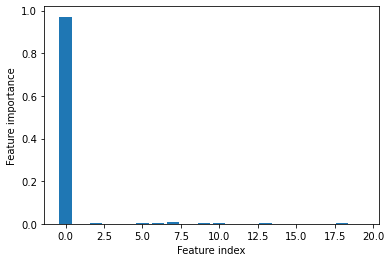

In [42]:
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), importances)
plt.xlabel('Feature index')
plt.ylabel('Feature importance')
plt.show()
# Only Pre-gold is important. Remove it for further assessment.

In [43]:
# Remove gold as independent variable
X = df.iloc[:,4:]
y = df.iloc[:,1]

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Obtain feature importances
importances = model.feature_importances_

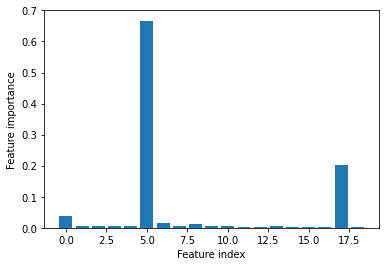

In [45]:
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), importances)
plt.xlabel('Feature index')
plt.ylabel('Feature importance')
plt.show()
# Only Pre-gold is important. Remove it for further assessment.

In [46]:
print(importances)
print(X.iloc[:,5])
print(X.iloc[:,-2])
# Model suggest GFL and WPM

[0.03880124 0.00493905 0.00454743 0.00510331 0.00596508 0.66677321
 0.0150744  0.00453813 0.01308523 0.00533398 0.00621427 0.0032623
 0.00407335 0.00542402 0.00325843 0.00376774 0.00312593 0.20263636
 0.00407652]
0       6.05
1       5.56
2       5.60
3       5.13
4       5.07
       ...  
768    12.31
769    12.22
770    12.18
771    12.39
772    12.27
Name: GFL, Length: 773, dtype: float64
0      27.93
1      26.91
2      27.07
3      26.45
4      26.28
       ...  
768    45.22
769    45.39
770    45.72
771    46.46
772    45.97
Name: WPM, Length: 773, dtype: float64


In [47]:
len(df)*0.9

695.7

In [48]:
X_train = X.iloc[:695,:]
X_test = X.iloc[695:,:]
y_train = y.iloc[:695]
y_test = y.iloc[695:]

In [49]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# Define the base models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = SVR()

# Create the voting regressor
ensemble = VotingRegressor([('lr', model1), ('dt', model2), ('rf', model3),('svm', model4)])

# Fit the voting regressor to the training data
ensemble.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble.predict(X_test)


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)


In [51]:
print(mae)
print(mse)
print(r2)

38.56235052265836
2132.3573016042874
0.745980309338445


In [52]:
# Fit each individual model to the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# Make predictions on the test data using each individual model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

# Calculate the mean absolute error for each individual model
mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
mae3 = mean_absolute_error(y_test, y_pred3)
mae4 = mean_absolute_error(y_test, y_pred4)


# Compare the performance of each individual model to the performance of the voting regressor
print("MAE of model 1: ", mae1)
print("MAE of model 2: ", mae2)
print("MAE of model 3: ", mae3)
print("MAE of model 4: ", mae4)
print("MAE of voting regressor: ", mae)


MAE of model 1:  36.89244345490708
MAE of model 2:  39.719871794871814
MAE of model 3:  32.89773717948717
MAE of model 4:  79.3070058710414
MAE of voting regressor:  38.56235052265836


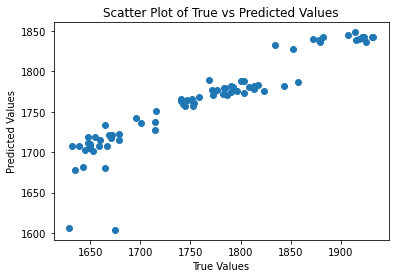

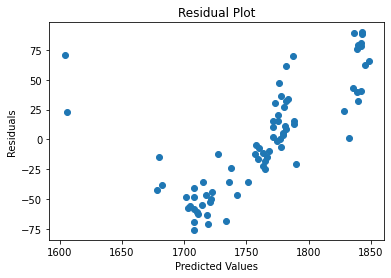

In [53]:
import matplotlib.pyplot as plt

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs Predicted Values")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


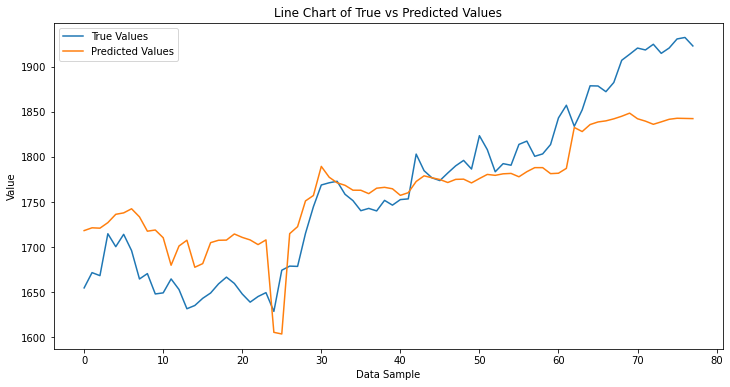

In [55]:
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel("Data Sample")
plt.ylabel("Value")
plt.title("Line Chart of True vs Predicted Values")
plt.legend()
plt.show()
